<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/EX_W4_AdaptiveFoodSuggetionEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=2b0ee694a7c42f92202f24e51db45e58de200fcfc6c7b84a64a90807e3ea9bee
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


3.000000000049814


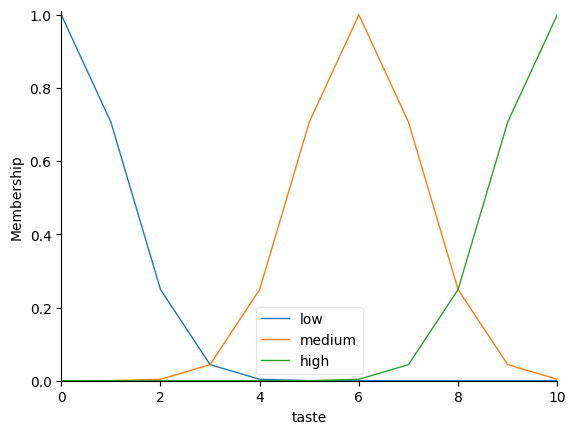

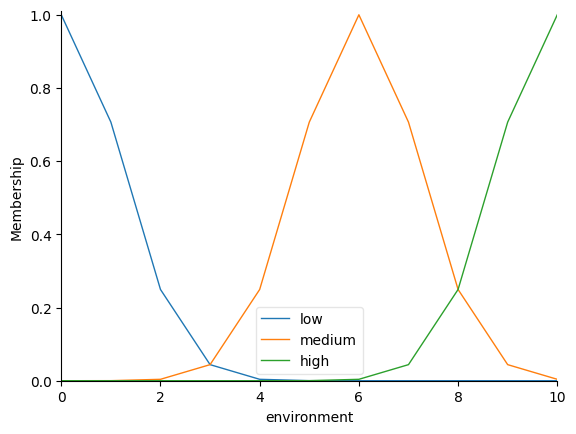

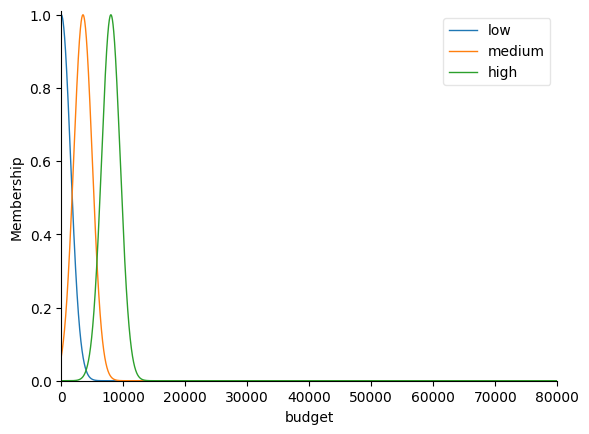

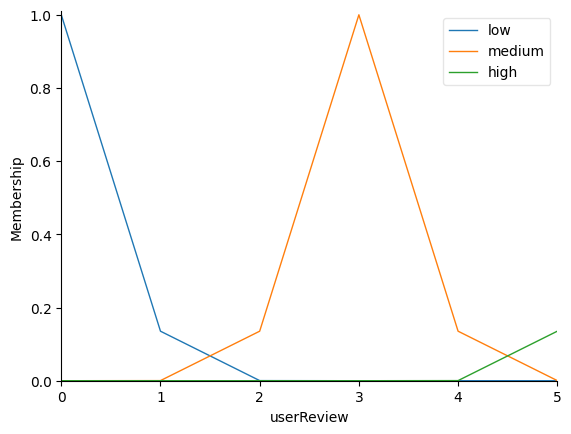

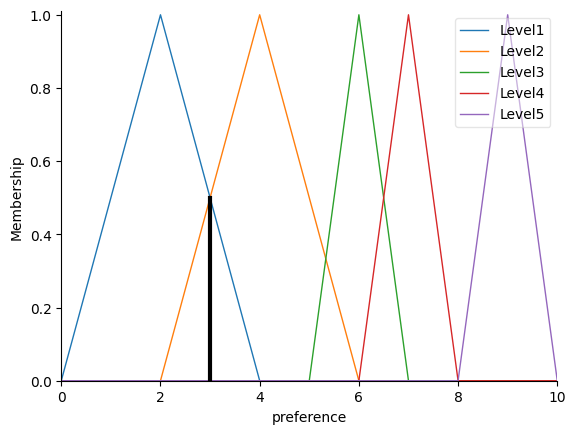

In [4]:
#import library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0, 11, 1), 'taste')
environment = ctrl.Antecedent(np.arange(0, 11, 1), 'environment')
budget = ctrl.Antecedent(np.arange(0, 80001, 1), 'budget')
userReview = ctrl.Antecedent(np.arange(0, 6, 1), 'userReview')
preference = ctrl.Consequent(np.arange(0, 10.1, 1), 'preference')

taste['low']=fuzz.gaussmf(taste.universe, 0, 1.2)
taste['medium']=fuzz.gaussmf(taste.universe, 6, 1.2)
taste['high']=fuzz.gaussmf(taste.universe, 10, 1.2)

environment['low']=fuzz.gaussmf(environment.universe, 0, 1.2)
environment['medium']=fuzz.gaussmf(environment.universe, 6, 1.2)
environment['high']=fuzz.gaussmf(environment.universe, 10, 1.2)

budget['low']=fuzz.gaussmf(budget.universe, 0, 1500)
budget['medium']=fuzz.gaussmf(budget.universe, 3500, 1500)
budget['high']=fuzz.gaussmf(budget.universe, 8000, 1500)

userReview['low']=fuzz.gaussmf(userReview.universe, 0, 0.5)
userReview['medium']=fuzz.gaussmf(userReview.universe, 3, 0.5)
userReview['high']=fuzz.gaussmf(userReview.universe, 6 ,0.5)

preference['Level1'] = fuzz.trimf(preference.universe, [0, 2 ,4])
preference['Level2'] = fuzz.trimf(preference.universe, [2, 4, 6])
preference['Level3'] = fuzz.trimf(preference.universe, [5 , 6, 7])
preference['Level4'] = fuzz.trimf(preference.universe, [6 , 7, 8])
preference['Level5'] = fuzz.trimf(preference.universe, [8, 9, 10])

#Show
taste.view()
environment.view()
budget.view()
userReview.view()

#Tạo ra các luật cho máy học
rule1 = ctrl.Rule(taste['low'] & environment['low'] & budget['low'] & userReview['low'], preference['Level1'])
rule2 = ctrl.Rule(taste['low'] & environment['medium'] & budget['low'] & userReview['low'], preference['Level1'])
rule3 = ctrl.Rule(taste['low'] & environment['high'] & budget['low'] & userReview['low'], preference['Level2'])
rule4 = ctrl.Rule(taste['low'] & environment['low'] & budget['medium'] & userReview['low'], preference['Level1'])
rule5 = ctrl.Rule(taste['low'] & environment['medium'] & budget['high'] & userReview['low'], preference['Level2'])
rule6 = ctrl.Rule(taste['low'] & environment['low'] & budget['low'] & userReview['medium'], preference['Level2'])
rule7 = ctrl.Rule(taste['low'] & environment['medium'] & budget['low'] & userReview['high'], preference['Level2'])
rule8 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['low'] & userReview['low'], preference['Level2'])
rule9 = ctrl.Rule(taste['high'] & environment['high'] & budget['low'] & userReview['low'], preference['Level2'])
rule10 = ctrl.Rule(taste['high'] & environment['high'] & budget['high'] & userReview['high'], preference['Level4'])
rule11 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['medium'] & userReview['medium'], preference['Level3'])
rule11 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['high'] & userReview['high'], preference['Level4'])
rule12 = ctrl.Rule(taste['high'] & environment['high'] & budget['high'] & userReview['high'], preference['Level5'])
rule13 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['medium'] & userReview['medium'], preference['Level5'])
rule14 = ctrl.Rule(taste['low'] & environment['low'] & budget['low'] & userReview['low'], preference['Level5'])





preferencing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,rule8, rule9, rule10, rule11]) #thu thap data

preferencing = ctrl.ControlSystemSimulation(preferencing_ctrl)   #teach

preferencing.input['taste'] = 1.0
preferencing.input['environment'] = 8.0
preferencing.input['budget'] = 9.0
preferencing.input['userReview'] = 2.0

#Output
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim = preferencing)
